# Congressional Voting Records - frequent itemset mining

Use of external resources:


* [Pandas documentation](https://pandas.pydata.org/docs/index.html)
* [NumPy documentation](https://numpy.org/doc/)
* [Matplotlib documentation](https://matplotlib.org/stable/index.html)


Collaboration:

*   No collaboration



Required libraries:

In [2]:
# standard / 3rd party
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.typing import NDArray

# local
from pyfim import *

## Data presentation

**Brief description**

The dataset (URL of the dataset [here](https://archive.ics.uci.edu/dataset/105/congressional+voting+records)) contains information about voting results of each U.S. Congressman on the following 16 matters (together with the information whether the particular Congressman is a republican or democrat):

Name | Data Type | Values |
---- | -----| ----------- |
handicapped-infants | Categorical | (y - yes, n - no, ? - neither one)
water-project-cost-sharing | Categorical | (y - yes, n - no, ? - neither one)
adoption-of-the-budget-resolution | Categorical | (y - yes, n - no, ? - neither one)
physician-fee-freeze | Categorical | (y - yes, n - no, ? - neither one)
el-salvador-aid | Categorical | (y - yes, n - no, ? - neither one)
religious-groups-in-schools | Categorical | (y - yes, n - no, ? - neither one)
anti-satellite-test-ban | Categorical | (y - yes, n - no, ? - neither one)
aid-to-nicaraguan-contras | Categorical | (y - yes, n - no, ? - neither one)
mx-missile | Categorical | (y - yes, n - no, ? - neither one)
immigration | Categorical | (y - yes, n - no, ? - neither one)
synfuels-corporation-cutback | Categorical | (y - yes, n - no, ? - neither one)
education-spending | Categorical | (y - yes, n - no, ? - neither one)
superfund-right-to-sue | Categorical | (y - yes, n - no, ? - neither one)
crime | Categorical | (y - yes, n - no, ? - neither one)
duty-free-exports | Categorical | (y - yes, n - no, ? - neither one)
export-administration-act-south-africa | Categorical | (y - yes, n - no, ? - neither one)
class | Categorical | (democrat, republican)


Notice that the dataset contains purely categorical data.

**Dataset presentation**

First, we load the data (from a local file)

In [3]:
PATH = "./house-votes-84.data"

COLUMNS = [
   "class",
   "handicapped-infants",
   "water-project-cost-sharing",
   "adoption-of-the-budget-resolution",
   "physician-fee-freeze",
   "el-salvador-aid",
   "religious-groups-in-schools",
   "anti-satellite-test-ban",
   "aid-to-nicaraguan-contras",
  "mx-missile",
  "immigration",
  "synfuels-corporation-cutback",
  "education-spending",
  "superfund-right-to-sue",
  "crime",
  "duty-free-exports",
  "export-administration-act-south-africa"
]

dataset = pd.read_csv(PATH, names=COLUMNS)
dataset.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


Next, we show summary characteristics of the dataset:

In [4]:
dataset.describe()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


We may observe that there are 435 congressmen in total (count). Next, we observe that each attribute has a domain of 3 elements (unique) (besides class attribute, which has only 2 possible values). Furthermore, we are able to see the most frequent value for each attribute (top) together with its frequency (freq).

The voting results are visible in the following histogram:

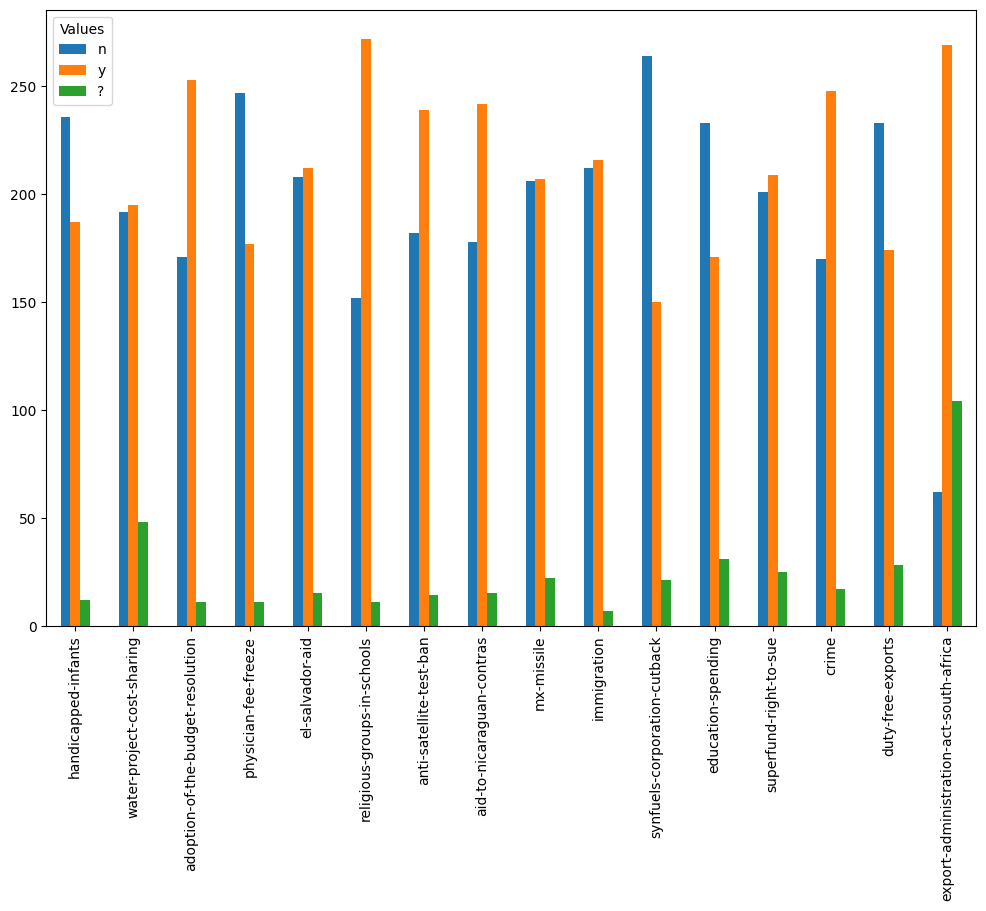

In [5]:
cdf = pd.DataFrame()
for feature in dataset.drop("class", axis=1).columns:
    counts = dataset[feature].value_counts()
    for val in ["y", "n", "?"]:
        if val not in counts.index:
            counts[val] = 0

    cdf[feature] = counts

cdf.T.plot(kind="bar", figsize=(12, 8))
plt.legend(title='Values')

We can see that the value `?` - not yes either no, is not very common. Regarding the rest, it strongly depends on the particular question. There are questions the result of which is very close and also questions with clear outcome.

More complex exploration could be applied. For instance, correspondence analysis, categorical correlation, and cross-tabulation etc. However, we focus on doing frequent itemset mining, thus, we will omit these.

## Data preprocessing

Now we are going to convert our dataset into set of transactions. Since all the features are categorical with 3 possible answers, we are going to binarize each of them similarly to binarization presented in `fim_abalone` notebook. Regarding the `class`attribute, since it is already binary, we could create item "democrat" denoting political party of given congressman. However, for easier manipulation while filtering frequent itemsets (see the section below) and also better readability and convenience, we will split it anyway. That way, it is going to be easy to recognize the political party of each "transaction" (i.e. congressman).

The following code is a modified version of code and from `fim_abalone` notebook.

In [6]:
def cats_to_item_labels(var_name: str, cats: list[str]) -> list[str]:
    return [ f"{var_name}_{cat}" for cat in cats]

def categorical_variable_to_items(dtf: pd.DataFrame, var_name: str) -> tuple[NDArray, list[str]]:
    cols = pd.crosstab(dtf.index, [dtf[var_name]])
    cats = list(cols.columns)
    return cols.values.T, cats_to_item_labels(var_name, cats)

By using functions above, we convert each feature into couple of disjoint binary features resulting in a binary matrix indicating the voting of each congressman:

In [7]:
bin_dataset = pd.DataFrame()

for attr in dataset.columns:
    cols, labels = categorical_variable_to_items(dataset, attr)
    for i in range(len(cols)):
        bin_dataset[ labels[i] ] = cols[i]

bin_mat = bin_dataset.to_numpy()
bin_mat

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0]])

Finally, since our algorithm expects each transaction in the "set of items" form, we are going to convert it:

In [8]:
tracts = [set(np.where(r)[0]) for r in bin_mat]
n = len(tracts)
tracts[:4]

[{1, 3, 7, 9, 13, 16, 19, 21, 24, 27, 31, 32, 37, 40, 43, 45, 49},
 {1, 3, 7, 9, 13, 16, 19, 21, 24, 27, 30, 33, 37, 40, 43, 45, 47},
 {0, 2, 7, 10, 11, 16, 19, 21, 24, 27, 30, 34, 36, 40, 43, 45, 48},
 {0, 3, 7, 10, 12, 14, 19, 21, 24, 27, 30, 34, 36, 40, 42, 45, 49}]

Similar to the abalone example, we see that each transaction comprises 17 items, which is equal to number of features in the original dataset. This phenomenon happens for the same reason as in the abalone example.

In [9]:
set([len(tract) for tract in tracts])

{17}

## Frequent itemset mining

Now, we are finally ready to perform mining on our list of transactions. As a first try, we will use 10% relative support threshold and see how it goes.

In [10]:
%timeit fim(tracts, target='s', supp=10)
freqs = fim(tracts, target='s', supp=10)
print("# frequent itemsets: ", len(freqs))

696 ms ± 42.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# frequent itemsets:  92746


We can see that we mined a large number of frequent itemsets.

In [11]:
def print_frequent(freqs, must_contain: list[str] | None = None, wrt: int=-1) -> None:
    """
    Function to print a set of frequent itemsets <freqs>

    if <must_contain> is not None, the following filtering is applied:
        for every item in <must_contain>
            if the item is list:
                at least one of the items of that list must be present in each filtered frequent itemset
            else
                each filtered frequent itemset must contain that item

    after the filtering phase, top 10 frequent itemsets (sorted by support in descending order) are printed
    (The percentage is relative to <wrt>. If <wrt> is -1, then we take it relative to the number of transactions.)
    """

    if wrt == -1:
        wrt = len(tracts)

    if must_contain is None:
        must_contain = []

    filtered = []
    for freq in freqs:
        success = True
        labels = [bin_dataset.columns[x] for x in freq[0]]
        for feature in must_contain:
            if type(feature) == list:
                found = False
                for option in feature:
                    if option in labels:
                        found = True
                        break
                success = found

            elif feature not in labels:
                success = False

            if not success:
                break

        if success:
            filtered.append(freq)

    for i, freq in enumerate(sorted(filtered, key=lambda x: -x[1])[:10]):
        print(str(i) + " (" + " ".join([bin_dataset.columns[x] for x in freq[0]]) + ")", freq[1], f"{(freq[1] / wrt * 100):.1f}%")

Let's have a look on a few most frequent ones:

In [12]:
print_frequent(freqs)

0 (religious-groups-in-schools_y) 272 62.5%
1 (export-administration-act-south-africa_y) 269 61.8%
2 (class_democrat) 267 61.4%
3 (synfuels-corporation-cutback_n) 264 60.7%
4 (adoption-of-the-budget-resolution_y) 253 58.2%
5 (crime_y) 248 57.0%
6 (physician-fee-freeze_n) 247 56.8%
7 (physician-fee-freeze_n class_democrat) 245 56.3%
8 (aid-to-nicaraguan-contras_y) 242 55.6%
9 (anti-satellite-test-ban_y) 239 54.9%


Similar to the abalone example, we see mostly singleton itemsets. We can already see that most congressmen vote positively for religious groups in school (itemset #0). The interesting thing is that in this case we also see one itemset of size 2, namely, it seems that the most of democrats voted "no" for "physician-fee-freeze" question (itemset #7). Actually, We can tell exactly what proportion of democrats voted "no" in that matter (approximating a probability that a congressman votes "no" in that matter given it is a democrat):

In [13]:
n_democrats = np.sum(bin_dataset["class_democrat"])
245 / n_democrats

0.9176029962546817

Since singleton itemsets are not of our interest, we will allow only itemsets of size at least 2 to be present in the results.

In [14]:
freqs = fim(tracts, target='s', supp=10, zmin=2)
print("# frequent itemsets: ", len(freqs))
print_frequent(freqs)

# frequent itemsets:  92710
0 (physician-fee-freeze_n class_democrat) 245 56.3%
1 (adoption-of-the-budget-resolution_y class_democrat) 231 53.1%
2 (physician-fee-freeze_n adoption-of-the-budget-resolution_y class_democrat) 219 50.3%
3 (physician-fee-freeze_n adoption-of-the-budget-resolution_y) 219 50.3%
4 (aid-to-nicaraguan-contras_y class_democrat) 218 50.1%
5 (aid-to-nicaraguan-contras_y adoption-of-the-budget-resolution_y) 215 49.4%
6 (crime_y religious-groups-in-schools_y) 214 49.2%
7 (education-spending_n class_democrat) 213 49.0%
8 (aid-to-nicaraguan-contras_y physician-fee-freeze_n) 211 48.5%
9 (anti-satellite-test-ban_y aid-to-nicaraguan-contras_y) 210 48.3%


Let's try to get only the frequent itemsets that inlclude either democrat or republican class to reveal some information about them. We take all the percentages relatively to the number of democrats/republicans respectively this time.

In [15]:
print_frequent(freqs, must_contain=["class_democrat"], wrt=np.sum( bin_dataset["class_democrat"] ))

0 (physician-fee-freeze_n class_democrat) 245 91.8%
1 (adoption-of-the-budget-resolution_y class_democrat) 231 86.5%
2 (physician-fee-freeze_n adoption-of-the-budget-resolution_y class_democrat) 219 82.0%
3 (aid-to-nicaraguan-contras_y class_democrat) 218 81.6%
4 (education-spending_n class_democrat) 213 79.8%
5 (aid-to-nicaraguan-contras_y physician-fee-freeze_n class_democrat) 210 78.7%
6 (aid-to-nicaraguan-contras_y adoption-of-the-budget-resolution_y class_democrat) 203 76.0%
7 (education-spending_n physician-fee-freeze_n class_democrat) 201 75.3%
8 (el-salvador-aid_n class_democrat) 200 74.9%
9 (anti-satellite-test-ban_y class_democrat) 200 74.9%


In [16]:
print_frequent(freqs, must_contain=["class_republican"], wrt=np.sum( bin_dataset["class_republican"] ) )

0 (class_republican physician-fee-freeze_y) 163 97.0%
1 (class_republican crime_y) 158 94.0%
2 (class_republican el-salvador-aid_y) 157 93.5%
3 (class_republican el-salvador-aid_y physician-fee-freeze_y) 156 92.9%
4 (class_republican crime_y physician-fee-freeze_y) 155 92.3%
5 (class_republican religious-groups-in-schools_y) 149 88.7%
6 (class_republican el-salvador-aid_y crime_y) 149 88.7%
7 (class_republican el-salvador-aid_y crime_y physician-fee-freeze_y) 148 88.1%
8 (class_republican religious-groups-in-schools_y physician-fee-freeze_y) 147 87.5%
9 (class_republican mx-missile_n) 146 86.9%


One interesting observation is that most of republicans voted "yes" in "physician-fee-freeze" question while the opposite holds for democrats (itemset #0). From all shown itemsets, it is apparent that majorities of both parties are consistent with each other on the most of the questions.

Next, we can, for instance, have a look about their opinion on crime:

In [17]:
print_frequent(freqs, must_contain=["class_democrat", ["crime_y", "crime_n", "crime_?"]], wrt=np.sum( bin_dataset["class_democrat"] ))

0 (crime_n class_democrat) 167 62.5%
1 (crime_n physician-fee-freeze_n class_democrat) 163 61.0%
2 (crime_n aid-to-nicaraguan-contras_y class_democrat) 159 59.6%
3 (crime_n adoption-of-the-budget-resolution_y class_democrat) 158 59.2%
4 (crime_n adoption-of-the-budget-resolution_y physician-fee-freeze_n class_democrat) 156 58.4%
5 (crime_n aid-to-nicaraguan-contras_y physician-fee-freeze_n class_democrat) 156 58.4%
6 (crime_n el-salvador-aid_n class_democrat) 152 56.9%
7 (crime_n adoption-of-the-budget-resolution_y aid-to-nicaraguan-contras_y class_democrat) 152 56.9%
8 (crime_n education-spending_n class_democrat) 150 56.2%
9 (crime_n adoption-of-the-budget-resolution_y aid-to-nicaraguan-contras_y physician-fee-freeze_n class_democrat) 150 56.2%


In [18]:
print_frequent(freqs, must_contain=["class_republican", ["crime_y", "crime_n", "crime_?"]], wrt=np.sum( bin_dataset["class_republican"] ))

0 (class_republican crime_y) 158 94.0%
1 (class_republican crime_y physician-fee-freeze_y) 155 92.3%
2 (class_republican el-salvador-aid_y crime_y) 149 88.7%
3 (class_republican el-salvador-aid_y crime_y physician-fee-freeze_y) 148 88.1%
4 (class_republican religious-groups-in-schools_y crime_y) 140 83.3%
5 (class_republican religious-groups-in-schools_y crime_y physician-fee-freeze_y) 139 82.7%
6 (class_republican mx-missile_n crime_y) 138 82.1%
7 (class_republican mx-missile_n crime_y physician-fee-freeze_y) 137 81.5%
8 (class_republican mx-missile_n crime_y el-salvador-aid_y) 137 81.5%
9 (class_republican religious-groups-in-schools_y crime_y el-salvador-aid_y) 137 81.5%


We can clearly see that majority of republicans voted "yes" for "crime" question while opposite holds for democrats (itemsets #0 in each printout). It is also apparent that the democrats were not so unitied on this one.

Finally, let us use only closed frequent itemsets of size at least 2 and look at the situation of "el-salvador-aid".

In [19]:
freqs = fim(tracts, target='c', supp=10, zmin=2)
print("# frequent itemsets: ", len(freqs))
print_frequent(freqs, must_contain=["class_democrat", ["el-salvador-aid_y", "el-salvador-aid_n", "el-salvador-aid_?"]], wrt=np.sum( bin_dataset["class_democrat"] ))

# frequent itemsets:  45950
0 (el-salvador-aid_n class_democrat) 200 74.9%
1 (el-salvador-aid_n class_democrat aid-to-nicaraguan-contras_y) 197 73.8%
2 (el-salvador-aid_n physician-fee-freeze_n class_democrat) 194 72.7%
3 (el-salvador-aid_n physician-fee-freeze_n aid-to-nicaraguan-contras_y class_democrat) 191 71.5%
4 (el-salvador-aid_n adoption-of-the-budget-resolution_y class_democrat) 184 68.9%
5 (el-salvador-aid_n adoption-of-the-budget-resolution_y class_democrat aid-to-nicaraguan-contras_y) 182 68.2%
6 (el-salvador-aid_n anti-satellite-test-ban_y class_democrat) 182 68.2%
7 (el-salvador-aid_n adoption-of-the-budget-resolution_y physician-fee-freeze_n class_democrat) 181 67.8%
8 (el-salvador-aid_n adoption-of-the-budget-resolution_y physician-fee-freeze_n aid-to-nicaraguan-contras_y class_democrat) 179 67.0%
9 (el-salvador-aid_n anti-satellite-test-ban_y class_democrat aid-to-nicaraguan-contras_y) 179 67.0%


In [20]:
print_frequent(freqs, must_contain=["class_republican", ["el-salvador-aid_y", "el-salvador-aid_n", "el-salvador-aid_?"]], wrt=np.sum( bin_dataset["class_republican"] ))

0 (class_republican el-salvador-aid_y) 157 93.5%
1 (class_republican el-salvador-aid_y physician-fee-freeze_y) 156 92.9%
2 (class_republican el-salvador-aid_y crime_y) 149 88.7%
3 (class_republican el-salvador-aid_y crime_y physician-fee-freeze_y) 148 88.1%
4 (class_republican mx-missile_n el-salvador-aid_y) 145 86.3%
5 (class_republican religious-groups-in-schools_y el-salvador-aid_y) 145 86.3%
6 (class_republican mx-missile_n physician-fee-freeze_y el-salvador-aid_y) 144 85.7%
7 (class_republican religious-groups-in-schools_y el-salvador-aid_y physician-fee-freeze_y) 144 85.7%
8 (class_republican adoption-of-the-budget-resolution_n el-salvador-aid_y) 138 82.1%
9 (class_republican adoption-of-the-budget-resolution_n el-salvador-aid_y physician-fee-freeze_y) 137 81.5%


We see exactly opposite opinions of republicans and democrats on this matter as well.

## Association rules inference

Frequent itemsets contain a lot of interesting information. Moreover, we can build a set of association rules with desired level of confidence that they'll hold based on obtained frequent itemsets.

Let's mine frequent itemsets again. We set the relative support threshold to be 15% (just a guess for the starting point).

In [21]:
freqs = fim(tracts, target='s', supp=15, zmin=1)
print("# frequent itemsets: ", len(freqs))
print_frequent(freqs)

# frequent itemsets:  31080
0 (religious-groups-in-schools_y) 272 62.5%
1 (export-administration-act-south-africa_y) 269 61.8%
2 (class_democrat) 267 61.4%
3 (synfuels-corporation-cutback_n) 264 60.7%
4 (adoption-of-the-budget-resolution_y) 253 58.2%
5 (crime_y) 248 57.0%
6 (physician-fee-freeze_n) 247 56.8%
7 (physician-fee-freeze_n class_democrat) 245 56.3%
8 (aid-to-nicaraguan-contras_y) 242 55.6%
9 (anti-satellite-test-ban_y) 239 54.9%


Since for determining the confidence of association rule we will need to access number of supports of given itemset fast, we convert the result of our algorithm into dictionary mapping itemsets to the respective number of supports. For convenient searching, we sort the keys in the ascending order.

In [22]:
freq_map = {}
for a, b in freqs:
    freq_map[ tuple( sorted(a) ) ] = b

Now, we define a functions that determine the confidence of given association rule and infere association rules from the set of frequent itemsets respectively.

In [23]:
def conf(freq_map, x, y):
    """
    return confidence of rules <x> -> <y>
    based on support counts in <freq_map>
    """
    xy = tuple( set(x) | set(y) )

    return freq_map[ tuple( sorted(xy) ) ] / freq_map[ tuple( sorted(x) ) ]

The following function for association rules inference works as following:
We iterate over frequent itemsets. For each frequent itemset, we generate all it's subsets (we ignore empty set). Based on that subset (since it must be frequent as well), we split the itemset into antecedent and consequent and evaluate whether the confidence of such rule is above given threshold.

In [24]:
from itertools import combinations

def association_rules(freq_map, thr):
    rules = []
    for itemset, _ in freq_map.items():
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                consequent = tuple( set(itemset) - set(antecedent) )

                if len(consequent) == 0:
                    continue

                c = conf(freq_map, antecedent, consequent)
                if c >= thr:
                    rules.append( ( [antecedent, consequent], c ) )

    return rules

In [25]:
def print_rules(rules):
    for i, (rule, c) in enumerate( sorted(rules, key=lambda x: -x[1])[:10] ):
        a = "(" + " ".join([bin_dataset.columns[x] for x in rule[0]]) + ")"
        b = "(" + " ".join([bin_dataset.columns[x] for x in rule[1]]) + ")"
        print( f"{i}) {a} -> {b} (conf={c:.2f})" )

Finally, let us infere some rules with high confidence. We set the confidence threshold to be 80% (80% seems to be quite strong confidence, and we would like to get rules with high confidence that they really hold).

In [26]:
rules = association_rules(freq_map, 0.8)
print(len(rules))

1537436


We see that we obtained a lot of rules. Let us have a look at the most confident rules.

In [27]:
print_rules(rules)

0) (physician-fee-freeze_n aid-to-nicaraguan-contras_y export-administration-act-south-africa_?) -> (class_democrat) (conf=1.00)
1) (adoption-of-the-budget-resolution_y physician-fee-freeze_n export-administration-act-south-africa_?) -> (class_democrat) (conf=1.00)
2) (physician-fee-freeze_n export-administration-act-south-africa_?) -> (class_democrat) (conf=1.00)
3) (physician-fee-freeze_n synfuels-corporation-cutback_y crime_n) -> (class_democrat) (conf=1.00)
4) (physician-fee-freeze_n mx-missile_y synfuels-corporation-cutback_y) -> (class_democrat) (conf=1.00)
5) (physician-fee-freeze_n synfuels-corporation-cutback_y duty-free-exports_y) -> (class_democrat) (conf=1.00)
6) (physician-fee-freeze_n aid-to-nicaraguan-contras_y synfuels-corporation-cutback_y superfund-right-to-sue_n) -> (class_democrat) (conf=1.00)
7) (physician-fee-freeze_n synfuels-corporation-cutback_y superfund-right-to-sue_n) -> (class_democrat) (conf=1.00)
8) (physician-fee-freeze_n el-salvador-aid_n anti-satellite

The association rule X -> Y basically tells us that there is high probability (this probability is approximated by the confidence of given rule) that if a transaction contains X, it will also contain Y.

Regarding our situation, we observe that the most confident rules are all linked to the democratic political party. That suggests that democrats were united in a lot of questions during the voting. The rule #2, for instance, tells us that (based on our transactions), if someone voted "no" in question "physician-fee-freeze" and did not explicitly say "yes" or "no" in question "export-administration-act-south-africa", then they are certainly a democrat. Similar interpretation holds for other rules as well.